# nn.Module로 로지스틱 회귀 구현

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

nn.Sequential() 을 이용하여 nn.Module 층을 차례로 쌓을 수 있다. 이를 이용하여 인공신경망을 구현한다. <br>
아래에서는 선형함수 $Wx + b$ 와 시그모이드를 결합한다.

In [4]:
model = nn.Sequential(
    nn.Linear(2, 1), # 2차원을 입력받아 1차원으로 출력
    nn.Sigmoid() # 출력된 1차원의 값은 시그모이드의 입력
)

In [5]:
# 현재는 가중치가 임의로 초기화된 상태
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [6]:
# 현재 가중치와 편향은 다음과 같이 초기화되어 있다.
model[0]._parameters

OrderedDict([('weight',
              Parameter containing:
              tensor([[ 0.3643, -0.3121]], requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([-0.1371], requires_grad=True))])

In [7]:
# 다음과 같이 초기화된 가중치와 편향으로 계산하면 똑같은 결과를 얻을 수 있다
torch.sigmoid(x_train.matmul(model[0]._parameters['weight'].view(2, 1)) + model[0]._parameters['bias'])

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [8]:
hypothesis = model(x_train)

In [9]:
hypothesis

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [10]:
optimizer = optim.SGD(model.parameters(), lr=1)

EPOCHS = 1000
for epoch in range(EPOCHS + 1):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        prediction = (hypothesis >= 0.5).type(torch.int8)
        accuracy = ((prediction == y_train).type(torch.int8).sum() / len(y_train)) * 100
        print(f"EPOCH: {epoch:4d}/{EPOCHS} | accuracy: {accuracy:.5f}")
        

EPOCH:    0/1000 | accuracy: 83.33333
EPOCH:  100/1000 | accuracy: 100.00000
EPOCH:  200/1000 | accuracy: 100.00000
EPOCH:  300/1000 | accuracy: 100.00000
EPOCH:  400/1000 | accuracy: 100.00000
EPOCH:  500/1000 | accuracy: 100.00000
EPOCH:  600/1000 | accuracy: 100.00000
EPOCH:  700/1000 | accuracy: 100.00000
EPOCH:  800/1000 | accuracy: 100.00000
EPOCH:  900/1000 | accuracy: 100.00000
EPOCH: 1000/1000 | accuracy: 100.00000


학습이 종료되기 전부터 정확도가 100%임을 알 수 있다.

In [11]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


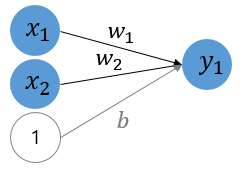

위의 구조로 인공신경망이 구성된 것으로 볼 수 있다. 가중치 w와 b를 통해 입력데이터는 특정 값을 가지고 이 값이 출력되기 전에 시그모이드 함수를 거친다. <br>
그러나 시그모이드 함수는 인공신경망에서 잘 사용되지 않는다.